<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Implementing_Linear_Regression_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A simple implemention of Linear Regression on Iris Dataset (w/o SciPy libraries)
https://www.hpc-carpentry.org/hpc-python/03-lists/index.html

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
# Convert the Bunch object to a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Include the target values and the target names
iris_df['target'] = iris.target
iris_df['Species'] = iris_df['target'].map(dict(enumerate(iris.target_names)))

NameError: name 'iris' is not defined

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
import numpy as np # linear algebra
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings

# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
warnings.filterwarnings('ignore')

# set max column to 999 for displaying in pandas
pd.options.display.max_columns=999

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

### Load Data

In [ ]:
data = iris_df.copy()

## **Preview of Dataset**

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
data.info() #nan = 0 (blank)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 6


## **Data Visualization**

In [ ]:
data = data[data['Species'].notnull()]

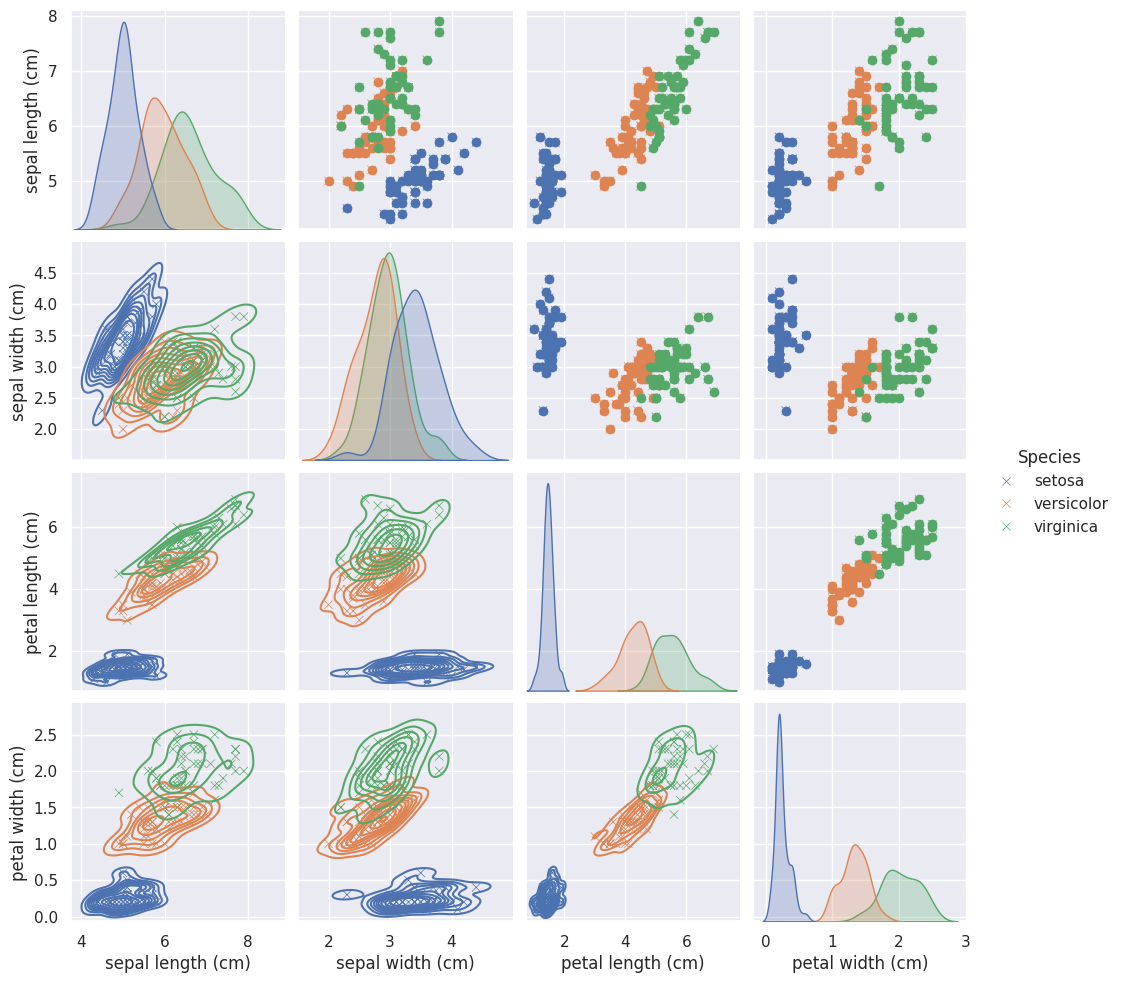

In [ ]:
snsdata = data.drop('target', axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'Species'],
      dtype='object')

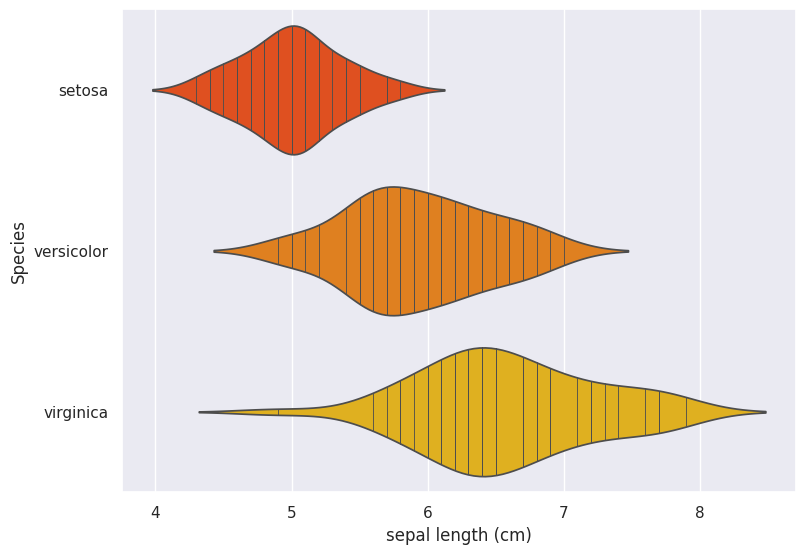

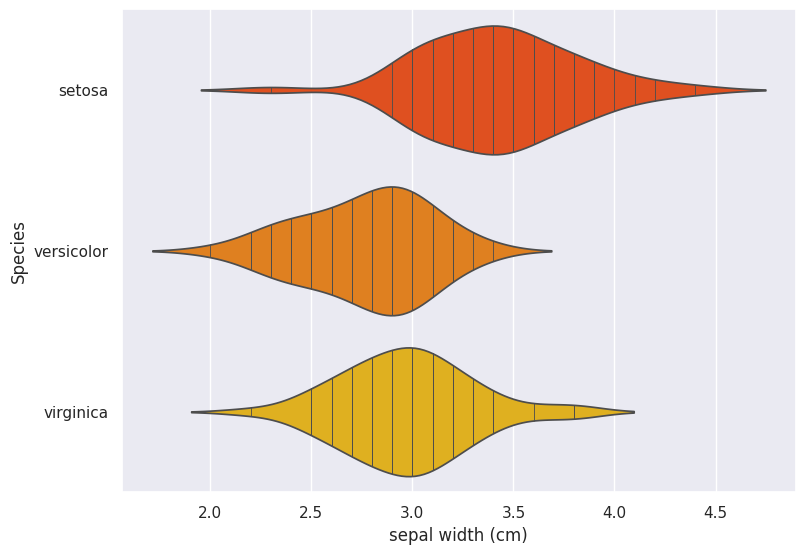

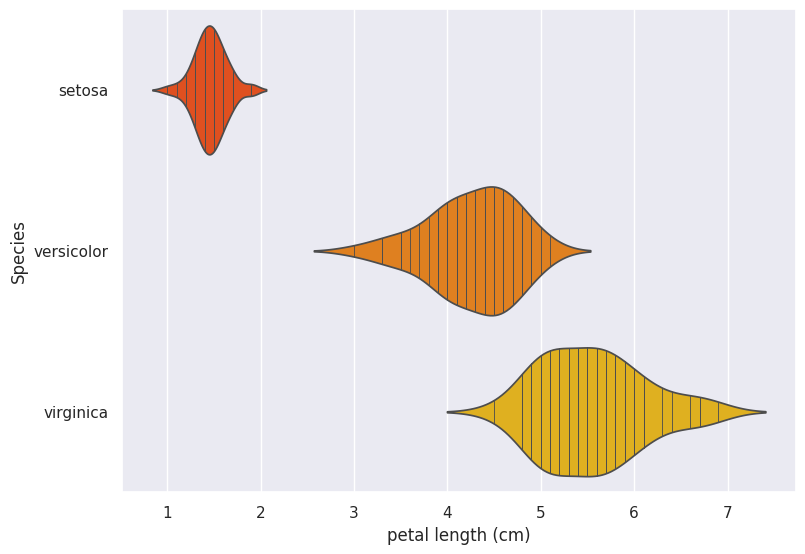

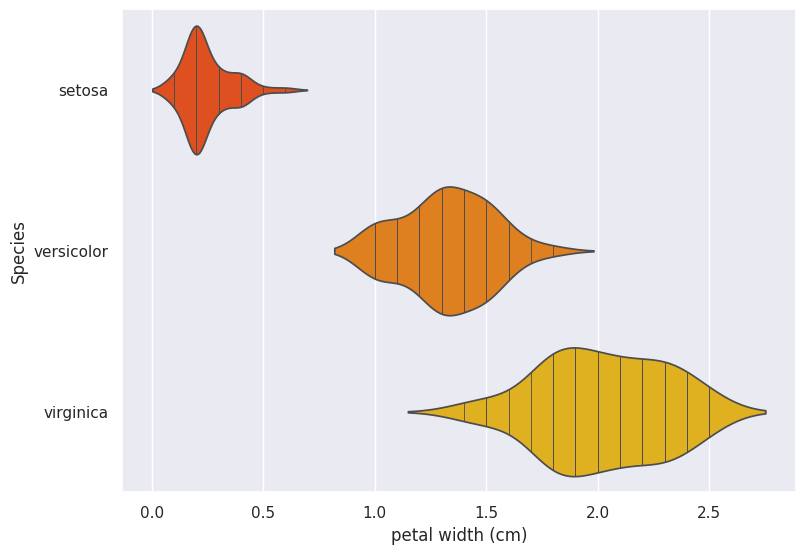

In [ ]:
sns.violinplot(x=data.columns[0], y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x=data.columns[1], y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x=data.columns[2], y='Species', data=data, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x=data.columns[3], y='Species', data=data, inner='stick', palette='autumn')
plt.show()

## **Multivariate Linear Regression Model**

In [ ]:
mapping = {
    'setosa' : 1,
    'versicolor' : 2,
    'virginica' : 3
}

X = data.drop(['target', 'Species'], axis=1).values # Input Feature Values
y = data.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [ ]:
X.shape

(150, 5)

In [ ]:
X[:5, :]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2]])

In [ ]:
np.random.seed(42) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]]


In [ ]:
iteration = 10000
learning_rate = 0.006 # ~ 0.007, 0.005, originally 0.003 If you are going by formula, this is actually alpha. based on < derivative
J = np.zeros(iteration) # 1 x 10000 maxtix

In [ ]:
# Let's train our model to compute values of theta
for i in range(iteration):
    # the predicted value is what we call y_hat
    y_hat = np.dot(X, theta.T) #transpose matrix, one-shot multiplication of matrixes to get error
    # the residue, or the error term is difference between what the
    # prediction was and what the true value is
    error = y_hat - y
    # we square the error (MSE) - why? to find error (largest in larger values)
    squared_error = error ** 2
    # now we sum up the error across all samples
    squared_error_sum = np.sum(squared_error)
    # we take the mean of this accumulated error
    J[i] = 1/(2 * rows) * squared_error_sum
    # this is the update rule -
    # we correct our estimate (theta) by a small faction of the gradient
    # gradient caclulation requires calculus - the
    theta -= ((learning_rate/rows) * np.dot(error.reshape(1,rows), X)) #learning rate 0.003; slow rate of movement down curve to get down to min value to avoid skipping of values

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

In [ ]:
# this is the model
theta #weight w0 (not width or waist)

array([[ 0.71293355, -0.15652423,  0.11483923,  0.39080032,  0.3156235 ]])

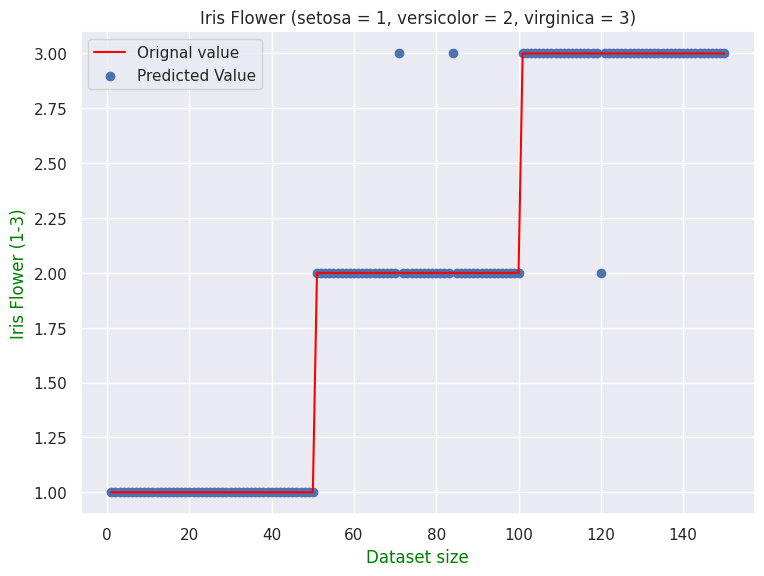

In [ ]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (setosa = 1, versicolor = 2, virginica = 3)")

ax.legend()
plt.show()

In [ ]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of 98.0
